In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import logging
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
def load_data(data_dir):
    """
    Loads all CSV files from the specified directory, cleans column names,
    and combines them into a single DataFrame.

    Args:
    - data_dir (str): Path to the directory containing CSV files.

    Returns:
    - pd.DataFrame: Combined DataFrame with data from all CSV files.
    """
    logging.info(f"Loading data from directory: {data_dir}")

    # List all CSV files in the directory
    csv_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.csv')]

    if not csv_files:
        raise FileNotFoundError(f"No CSV files found in directory: {data_dir}")

    dataframes = []

    for file in csv_files:
        try:
            # Load each CSV file into a DataFrame
            df = pd.read_csv(file)

            # Clean column names by stripping any leading or trailing whitespace
            df.columns = df.columns.str.strip()

            # Append the DataFrame to the list
            dataframes.append(df)

            # Log the shape of the loaded DataFrame
            logging.info(f"Loaded {file} with shape {df.shape}")

        except Exception as e:
            # Log an error if loading fails
            logging.error(f"Failed to load {file}. Error: {str(e)}")
            continue

    # Combine all DataFrames into one
    if dataframes:
        combined_df = pd.concat(dataframes, ignore_index=True)
        logging.info(f"Data loaded. Combined shape: {combined_df.shape}")
    else:
        raise ValueError("No valid dataframes to combine.")

    return combined_df

In [ ]:
# Set up logging (optional, for better logging output)
logging.basicConfig(level=logging.INFO)

In [ ]:
# Specify the path to your directory containing CSV files
data_dir = '/content/drive/MyDrive/Colab Notebooks/Files/'

# Load the data from the specified directory
try:
    df = load_data(data_dir)
    print(f"Data loaded successfully. Shape of the combined DataFrame: {df.shape}")
except Exception as e:
    logging.error(f"Error while loading data: {str(e)}")


Data loaded successfully. Shape of the combined DataFrame: (2830743, 79)


In [ ]:
def explore_data(df):
    """
    Function to explore a dataset by showing basic information,
    summary statistics, missing values, and visualizations.

    Args:
    - df (pd.DataFrame): The DataFrame to explore.
    """
    # Basic Information
    print("Basic Information:")
    df.info()
    print("\n")

    # Show the first 5 rows
    print("First 5 rows of data:")
    print(df.head())
    print("\n")

    # Summary statistics for numeric columns
    print("Summary statistics for numeric columns:")
    print(df.describe())
    print("\n")

    # Missing Values
    print("Missing values per column:")
    print(df.isnull().sum())
    print("\n")

    # Check for duplicates
    print("Number of duplicate rows:", df.duplicated().sum())
    print("\n")

    # Data Types of Columns
    print("Data types of columns:")
    print(df.dtypes)
    print("\n")

    # # Correlation heatmap for numeric columns
    # print("Correlation heatmap of numeric columns:")
    # # Select only numeric columns for correlation calculation
    # numeric_df = df.select_dtypes(include=['number'])
    # corr = numeric_df.corr()
    # plt.figure(figsize=(10, 8))
    # sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    # plt.title("Correlation Heatmap")
    # plt.show()

    # # Plot histograms for numeric columns
    # print("Histograms of numeric columns:")
    # # Select only numeric columns and replace infinite values with NaN
    # numeric_df = df.select_dtypes(include=['number'])
    # numeric_df = numeric_df.replace([np.inf, -np.inf], np.nan)  # Replace inf with NaN

    # # Drop rows with any NaN values in numeric columns before plotting
    # numeric_df.dropna().hist(bins=20, figsize=(12, 10))
    # plt.tight_layout()
    # plt.show()

# Call the explore_data function on your loaded DataFrame (df)
explore_data(df)


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max           

In [ ]:
# Check for missing values
df.isnull().sum()

,0
Destination Port,0
Flow Duration,0
Total Fwd Packets,0
Total Backward Packets,0
Total Length of Fwd Packets,0
...,...
Idle Mean,0
Idle Std,0
Idle Max,0
Idle Min,0


In [ ]:
# Handle missing values by filling with the mean for numeric columns only
for col in df.select_dtypes(include=np.number).columns:
    # Use direct assignment instead of inplace=True
    df[col] = df[col].fillna(df[col].mean())

In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
print(df.columns)

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [ ]:
# prompt: code to print all the different types of Label that exists in the dataset

print(df['Label'].unique())

['BENIGN' 'Bot' 'PortScan' 'Infiltration' 'Web Attack � Brute Force'
 'Web Attack � XSS' 'Web Attack � Sql Injection' 'FTP-Patator'
 'SSH-Patator' 'DoS slowloris' 'DoS Slowhttptest' 'DoS Hulk'
 'DoS GoldenEye' 'Heartbleed' 'DDoS']


In [ ]:
# Handle missing values by filling with the mean for numeric columns only
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].mean())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Data Preprocessing
label_columns = [col for col in df.columns if col.startswith('Label_')]
if not label_columns:
    if 'Label' in df.columns:
        label_columns = ['Label']
    else:
        raise ValueError("No suitable target variable column found.")
X = df.drop(columns=label_columns, axis=1)
y = df[label_columns]

encoder = LabelEncoder()
if y.shape[1] > 1:
    y_array = y.apply(lambda row: row.to_list(), axis=1).to_numpy()
    y = encoder.fit_transform(y_array)
elif y.shape[1] == 1:
    y = encoder.fit_transform(y.iloc[:, 0])
else:
    raise ValueError("Target variable 'y' has no columns.")

scaler = StandardScaler()
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Avoiding FutureWarning by using .loc for imputation
for col in X.select_dtypes(include=['number']).columns:
    X.loc[:, col] = X[col].fillna(X[col].mean())

X = scaler.fit_transform(X)

In [ ]:
y = tf.keras.utils.to_categorical(y, num_classes=15)

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# prompt: size of the x train y train and all the splitting etc

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2017889, 78)
y_train shape: (2017889, 15)
X_test shape: (504473, 78)
y_test shape: (504473, 15)


In [ ]:
# Build the neural network
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='softmax'))  # 15 output neurons, softmax activation

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'precision', 'recall'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50
31530/31530 ━━━━━━━━━━━━━━━━━━━━ 74s 2ms/step - accuracy: 0.9415 - loss: 0.2064 - precision: 0.9567 - recall: 0.9228 - val_accuracy: 0.9748 - val_loss: 0.0670 - val_precision: 0.9752 - val_recall: 0.9729
Epoch 2/50
31530/31530 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - accuracy: 0.9662 - loss: 0.0962 - precision: 0.9702 - recall: 0.9625 - val_accuracy: 0.9757 - val_loss: 0.0637 - val_precision: 0.9761 - val_recall: 0.9727
Epoch 3/50
31530/31530 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - accuracy: 0.9683 - loss: 0.0880 - precision: 0.9720 - recall: 0.9646 - val_accuracy: 0.9764 - val_loss: 0.0604 - val_precision: 0.9767 - val_recall: 0.9762
Epoch 4/50
31530/31530 ━━━━━━━━━━━━━━━━━━━━ 73s 2ms/step - accuracy: 0.9688 - loss: 0.0854 - precision: 0.9725 - recall: 0.9654 - val_accuracy: 0.9763 - val_loss: 0.0581 - val_precision: 0.9766 - val_recall: 0.9762
Epoch 5/50
31530/31530 ━━━━━━━━━━━━━━━━━━━━ 74s 2ms/step - accuracy: 0.9698 - loss: 0.0835 - precision: 0.9731 - recall: 0.9664 - val_accura

In [24]:
# Evaluate the model
# model.evaluate returns loss, accuracy, and other metrics specified in model.compile
evaluation_results = model.evaluate(X_test, y_test, verbose=0)

# Access the values by index
loss = evaluation_results[0]
accuracy = evaluation_results[1]

print(f'Test Accuracy: {accuracy:.2f}')

Test Accuracy: 0.99


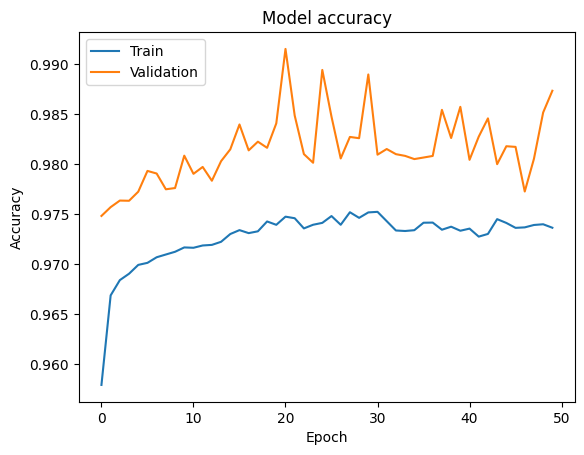

In [25]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

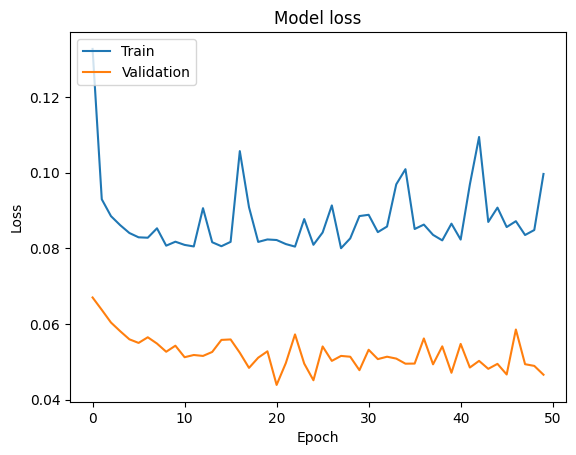

In [26]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [27]:
from tensorflow import keras

# Use 'model.save' directly, which is more idiomatic in TensorFlow 2.x
keras.models.save_model(model, 'trained_model-neuralnetwork-multiclassification.keras')
# You can also use the following, which has the same functionality
#model.save('network_traffic_model.keras')

In [30]:
# Load the model
loaded_model = load_model('trained_model-neuralnetwork-multiclassification.keras')

# Evaluate the loaded model
# model.evaluate might return more than just loss and accuracy,
# so use a catch-all to unpack the values.
evaluation_results = loaded_model.evaluate(X_test, y_test, verbose=0)
loaded_loss = evaluation_results[0]  # Loss is usually the first element
loaded_accuracy = evaluation_results[1]  # Accuracy is usually the second

print(f'Loaded Model Test Accuracy: {loaded_accuracy:.2f}')

Loaded Model Test Accuracy: 0.99


15765/15765 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step


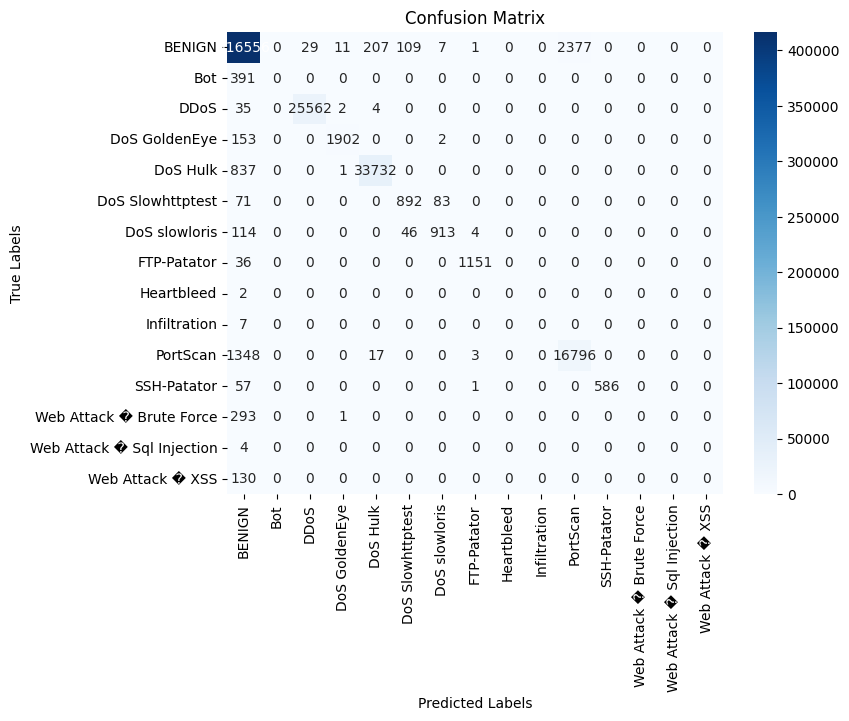

In [32]:
# Make predictions on the test set using the loaded model
y_pred = loaded_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class indices
y_true_classes = np.argmax(y_test, axis=1)  # Get true class indices

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_,  # Use original class labels if available
            yticklabels=encoder.classes_)  # Use original class labels if available
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [38]:
predictions = loaded_model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)  # Get the index of the highest probability

# Get label names using encoder.classes_
label_names = encoder.classes_

15765/15765 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step


In [39]:
# Print predictions with corresponding label names
for i in range(100):
    predicted_label_name = label_names[predicted_labels[i]]
    original_label_index = np.argmax(y_test[i]) # Get original label index from one-hot encoded y_test
    original_label_name = label_names[original_label_index] # Get original label name
    print(f"Original Label: {original_label_name}, Predicted Label: {predicted_label_name}")

Original Label: BENIGN, Predicted Label: BENIGN
Original Label: BENIGN, Predicted Label: BENIGN
Original Label: BENIGN, Predicted Label: BENIGN
Original Label: DoS Hulk, Predicted Label: DoS Hulk
Original Label: BENIGN, Predicted Label: BENIGN
Original Label: BENIGN, Predicted Label: BENIGN
Original Label: BENIGN, Predicted Label: BENIGN
Original Label: BENIGN, Predicted Label: BENIGN
Original Label: BENIGN, Predicted Label: BENIGN
Original Label: PortScan, Predicted Label: PortScan
Original Label: BENIGN, Predicted Label: BENIGN
Original Label: BENIGN, Predicted Label: BENIGN
Original Label: PortScan, Predicted Label: PortScan
Original Label: BENIGN, Predicted Label: BENIGN
Original Label: BENIGN, Predicted Label: BENIGN
Original Label: BENIGN, Predicted Label: BENIGN
Original Label: BENIGN, Predicted Label: BENIGN
Original Label: DoS Hulk, Predicted Label: DoS Hulk
Original Label: PortScan, Predicted Label: PortScan
Original Label: BENIGN, Predicted Label: BENIGN
Original Label: DDoS